In [39]:
import os
import pandas as pd

root_dir = os.getcwd()
df_benchmark = pd.read_csv(os.path.join(root_dir, "out", "benchmark.csv"))

df_benchmark = df_benchmark.rename(columns={
    'graph_name': 'Grafo',
    'vertices': 'Vértices',
    'edges': 'Arestas',
    'ff_sol': 'FF K',
    'ff_time': 'FF Tempo (ms)',
    'wp_sol': 'WP K',
    'wp_time': 'WP Tempo (ms)',
    'ldo_sol': 'LDO K',
    'ldo_time': 'LDO Tempo (ms)',
    'ido_sol': 'IDO K',
    'ido_time': 'IDO Tempo (ms)',
    'dsatur_sol': 'DSATUR K',
    'dsatur_time': 'DSATUR Tempo (ms)',
    'rlf_sol': 'RLF K',
    'rlf_time': 'RLF Tempo (ms)',
})

df_benchmark_avg = df_benchmark.groupby(['Grafo', 'Vértices', 'Arestas'], as_index=False)\
  .mean()\
  .astype({
    'FF K': 'int',
    'WP K': 'int',
    'LDO K': 'int',
    'IDO K': 'int',
    'DSATUR K': 'int',
    'RLF K': 'int'
  })

df_benchmark_avg.to_csv(os.path.join(root_dir, "out", "benchmark_avg.csv"))

display(df_benchmark)
display(df_benchmark_avg)

,Grafo,Vértices,Arestas,FF K,FF Tempo (ms),WP K,WP Tempo (ms),LDO K,LDO Tempo (ms),IDO K,IDO Tempo (ms),DSATUR K,DSATUR Tempo (ms),RLF K,RLF Tempo (ms)
0,C2000.5,2000,999836,226,19.7734,222,15.3121,222,17.0111,222,22.5198,222,305.1660,196,726.1910
1,C2000.5,2000,999836,226,19.7756,222,15.2919,222,17.2164,222,21.5240,222,309.9570,196,721.0170
2,C2000.5,2000,999836,226,19.6151,222,15.4665,222,17.1419,222,23.3264,222,308.2190,196,743.6270
3,C2000.5,2000,999836,226,19.6723,222,15.2818,222,16.7720,222,22.2119,222,307.0940,196,762.4560
4,C2000.5,2000,999836,226,19.9251,222,15.2648,222,17.0097,222,23.9394,222,313.3190,196,739.9360
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1045,r250.5,250,14849,79,0.1771,71,0.4034,71,0.2294,69,0.2850,71,0.9313,71,2.7505
1046,r250.5,250,14849,79,0.1860,71,0.3904,71,0.2355,69,0.2903,71,0.9614,71,2.7693
1047,r250.5,250,14849,79,0.2061,71,0.4097,71,0.2517,69,0.2916,71,0.9837,71,2.8062
1048,r250.5,250,14849,79,0.1748,71,0.3775,71,0.2885,69,0.2889,71,1.0312,71,2.6677


,Grafo,Vértices,Arestas,FF K,FF Tempo (ms),WP K,WP Tempo (ms),LDO K,LDO Tempo (ms),IDO K,IDO Tempo (ms),DSATUR K,DSATUR Tempo (ms),RLF K,RLF Tempo (ms)
0,C2000.5,2000,999836,226,19.799776,222,15.488744,222,17.381284,222,23.002490,222,319.284420,196,795.172300
1,C4000.5,4000,4000268,402,136.248300,396,52.712978,396,104.258660,403,130.014920,396,2832.670800,359,6519.987400
2,dsjc1000.1,1000,49629,31,0.248960,30,1.004484,30,0.321674,30,1.209648,30,3.332352,24,66.509782
3,dsjc1000.5,1000,249826,127,2.956652,124,3.389714,124,2.942990,127,4.132762,124,41.923266,108,90.633584
4,dsjc1000.9,1000,449449,321,13.266716,310,6.902692,310,13.940380,318,15.222368,310,112.010380,279,148.629500
5,dsjc250.5,250,31336,43,0.108558,40,0.268500,40,0.121274,40,0.233260,40,1.239172,35,1.950676
6,dsjc500.1,500,12458,20,0.058638,18,0.333582,18,0.103156,19,0.300098,18,0.607222,15,8.457616
7,dsjc500.5,500,62624,72,0.480560,69,0.964288,69,0.541374,70,0.785224,69,6.161168,60,11.826796
8,dsjc500.9,500,224874,175,1.904014,168,1.862376,168,2.129848,174,2.873802,168,16.505926,158,20.434986
9,dsjr500.1c,500,121275,109,0.609416,99,1.098598,99,1.165108,101,1.471542,99,12.647382,93,12.489802


In [40]:
with open(os.path.join(root_dir, "manuscript", "results_tab.tex"), 'w') as f:
    f.write(df_benchmark_avg.style.format(precision=2).hide(axis="index").to_latex())

In [ ]:
# C2000.5 del
# C4000.5 del
# dsjc1000.1 20
# dsjc1000.5 83
# dsjc1000.9 222
# dsjc250.5 28
# dsjc500.1 12
# dsjc500.5 48
# dsjc500.9 126
# dsjr500.1c 84
# dsjr500.5 122
# flat1000_50_0	 50
# flat1000_60_0 60
# flat1000_76_0 76
# flat300_28_0	28
# latin_square 97
# le450_25c 25
# le450_25d 25
# r1000.1c 98
# r1000.5 234
# r250.5 65

In [82]:
df_Graph_K = df_benchmark.groupby(['Grafo'], as_index=False)[['FF K', 'WP K', 'LDO K', 'IDO K', 'DSATUR K', 'RLF K']].first()

df_best_K = pd.DataFrame({
  'Grafo': ['C2000.5', 'C4000.5', 'dsjc1000.1', 'dsjc1000.5', 'dsjc1000.9', 'dsjc250.5', 'dsjc500.1', 'dsjc500.5', 'dsjc500.9', 'dsjr500.1c', 'dsjr500.5', 'flat1000_50_0', 'flat1000_60_0', 'flat1000_76_0', 'flat300_28_0', 'latin_square', 'le450_25c', 'le450_25d', 'r1000.1c', 'r1000.5', 'r250.5'],
  'Ideal': [float('nan'), float('nan'), 20, 83, 222, 28, 12, 48, 126, 84, 122, 50, 60, 76, 28, 97, 25, 25, 98, 234, 65]
})

df_Graph_K = df_Graph_K.merge(df_best_K, how='right').dropna()

for column in [c for c in df_Graph_K.columns if c.endswith(' K')]:
  df_Graph_K[column] = df_Graph_K['Ideal'] / df_Graph_K[column]

df_Graph_K


,Grafo,FF K,WP K,LDO K,IDO K,DSATUR K,RLF K,Ideal
2,dsjc1000.1,0.645161,0.666667,0.666667,0.666667,0.666667,0.833333,20.0
3,dsjc1000.5,0.653543,0.669355,0.669355,0.653543,0.669355,0.768519,83.0
4,dsjc1000.9,0.691589,0.716129,0.716129,0.698113,0.716129,0.795699,222.0
5,dsjc250.5,0.651163,0.700000,0.700000,0.700000,0.700000,0.800000,28.0
6,dsjc500.1,0.600000,0.666667,0.666667,0.631579,0.666667,0.800000,12.0
7,dsjc500.5,0.666667,0.695652,0.695652,0.685714,0.695652,0.800000,48.0
8,dsjc500.9,0.720000,0.750000,0.750000,0.724138,0.750000,0.797468,126.0
9,dsjr500.1c,0.770642,0.848485,0.848485,0.831683,0.848485,0.903226,84.0
10,dsjr500.5,0.853147,0.917293,0.917293,0.945736,0.917293,0.924242,122.0
11,flat1000_50_0,0.396825,0.413223,0.413223,0.409836,0.413223,0.467290,50.0


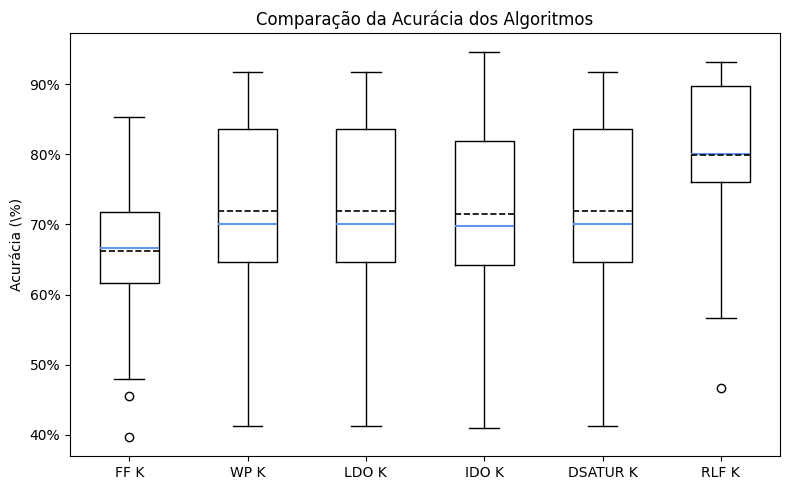

In [89]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter



# 3) Draw the boxplot
fig, ax = plt.subplots(figsize=(8, 5))
df_Graph_K[[c for c in df_Graph_K.columns if c.endswith(' K')]].plot.box(
    ax=ax,
    showmeans=True,       # draw the mean
    meanline=True,        # as a line (not a marker)
    meanprops={           # style for the mean‐lines
        "linestyle": "--",
        "color": "black",
        "linewidth": 1.2,
    },
    boxprops={"linewidth": 1},   # optional styling
    whiskerprops={"linewidth": 1},
    capprops={"linewidth": 1},
    medianprops={"color": "cornflowerblue", "linewidth": 1.5}
)

ax.yaxis.set_major_formatter(PercentFormatter(xmax=1.0, decimals=0))

ax.set_ylabel(r"Acurácia (\%)")
ax.set_title("Comparação da Acurácia dos Algoritmos")
# plt.xticks(rotation=45)
plt.tight_layout()
plt.show()